In [5]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##***GridsearchCV- GeneExpressionData***


---





In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


class gridSearch():
  def __init__(self,path):
    self.df = pd.read_csv(path, sep='\t')



  def process_data(self):
    df1 = self.df.dropna(subset = ['Death'])
    X=df1.iloc[:,2:10598]

    y=df1.iloc[:,1]
    return(X,y)

  def paramet(self,X,y):
    from sklearn.model_selection import GridSearchCV, cross_val_score

    import warnings
    warnings.filterwarnings('ignore')


  # instantiate the model (using the default parameters)
  # fit the model with data
    clf = LogisticRegression()
    # parameter grid
    parameters = {
        'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
        #'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
        'C': [-4,4,50,100,1000],

        #'C' : np.logspace(-3,3,7),
        'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
        #'random_state' : np.ndarray(),
        #'kernel': ('linear', 'rbf')
    }

    
    clf2 = GridSearchCV(clf,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=5)                     # number of folds

    clf2.fit(X,Y)

    print('Best Penalty:', clf2.best_estimator_.get_params())
    print('Best C:', clf2.best_estimator_.get_params())
    print(); print(clf2.best_estimator_.get_params())
    print("Tuned Hyperparameters :", clf2.best_params_)
    print("Accuracy :",clf2.best_score_)
    return(clf2)

if __name__ == "__main__":
  obj = gridSearch('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpressionData_LR.tsv')
  #print(obj)
  X,Y = obj.process_data()
  clf2 = obj.paramet(X,Y)

Best Penalty: {'C': 50, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best C: {'C': 50, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 50, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Tuned Hyperparameters : {'C': 50, 'penalty': 'l1', 'solver': 'saga'}
Accuracy : 0.7455985779426539


##***LR_GeneExpressionData - AUROC curves***

---



cross-validated score 0.760
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Accuracy score on training 0.778
Accuracy score on test 0.737


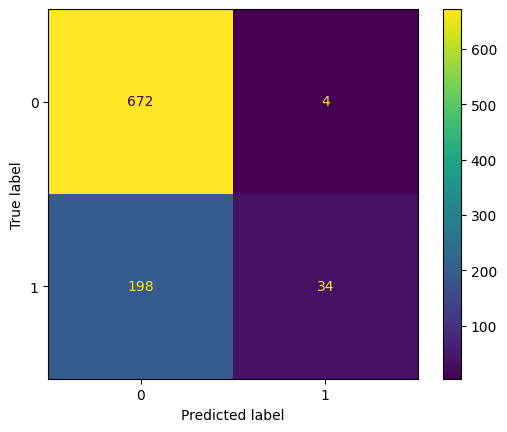

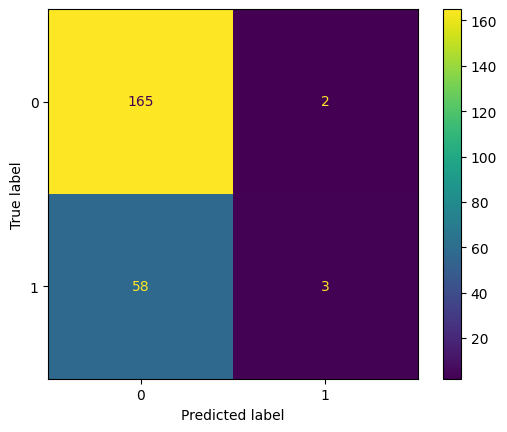

[[165   2]
 [ 58   3]]
Train_ROC_AUC:0.7635


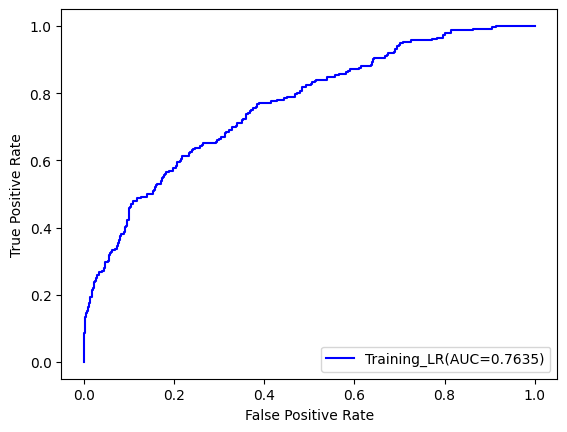

Test_ROC_AUC:0.6884


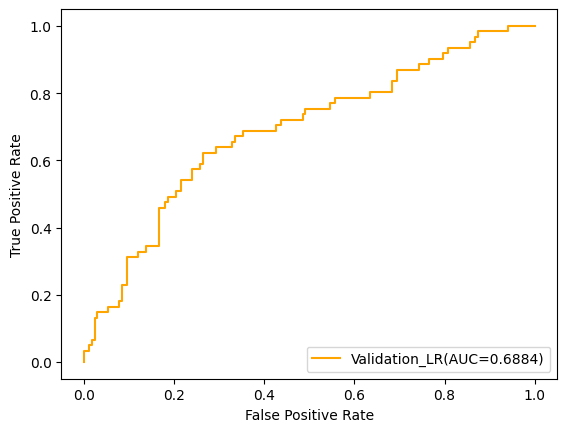

Train_PR_AUC:0.5801
Train_PR_Baseline:0.2555
Test_PR_AUC:0.4592
Test_PR_Baseline:0.2675
Train_f1 scores:0.0909
Test_f1 scores:0.2519


<Figure size 640x480 with 0 Axes>

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import random_correlation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score,recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from matplotlib import pyplot

class genetestmodel():
  def __init__(self,path):
    self.df = pd.read_csv(path, sep='\t')
    

  def process_data(self):
    df1 = self.df.dropna(subset = ['Death'])
    X=df1.iloc[:,2:10598]

    y=df1.iloc[:,1]
    return(X,y)

  def train_test(self,X,y):
    #Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=27)

  # instantiate the model (using the default parameters)
  # fit the model with data
    clf = LogisticRegression(penalty = "l1", C=50.0,solver= "saga", fit_intercept = True, intercept_scaling=1, tol= 0.0001,random_state=27)

    import warnings
    warnings.filterwarnings('ignore')

    clf.fit(X_train, y_train)
    scores= cross_val_score(clf,X_train, y_train, cv=5)
    CV = sum(scores)/5
    print("cross-validated score", str("%.3f" % CV))
    
    # Percentage of correct predictions
    t_pred=clf.predict(X_train)
  
    y_pred = clf.predict(X_test)
    print(y_pred)
    print("Accuracy score on training", "%.3f" %clf.score(X_train, y_train))
    print("Accuracy score on test", "%.3f" %clf.score(X_test, y_test))
    
    #Compute confusion matrix- Train
    y_pred_train = clf.predict(X_train)
    cm = confusion_matrix(y_train,y_pred_train, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()


    #Compute confusion matrix- Test
    cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()
    plt.savefig('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_ConfusionMatrix.png')
    print(cm)
    
    
    #f.write(str(cm)+"\n")
    #plot1="Fig1_"+str(pre)+".png"
    #plot2="Fig2_"+str(pre)+".png"
    #plot3="Fig3_"+str(pre)+".png"
    #plt.savefig(plot1)

    

      #AUROC Curve Plot- training set
  
    
    #Splt.savefig(plot2)
    y_pred_prob_train = clf.predict_proba(X_train)[::,1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob_train)
    train_ROCscore = roc_auc_score(y_train,y_pred_prob_train)
    auc = f"{train_ROCscore:.4f}"
    print(f"Train_ROC_AUC:{auc}") 
    
    plt.plot(fpr,tpr,label="Training_LR(AUC="+str(auc)+")", color="blue")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    plt.savefig('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_TrainingAUROCCurve.png')
   
   
   
    #AUROC Curve Plot- validation set




    y_pred_prob = clf.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)


    Test_ROCscore = roc_auc_score(y_test,y_pred_prob)
    test_auc = f"{Test_ROCscore:.4f}"
    print(f"Test_ROC_AUC:{test_auc}")
    #f.write(f"Test_ROC_AUC:{auc}"+"\n")
   # something=something+str(auc)+"\t"
    plt.plot(fpr,tpr,label="Validation_LR(AUC="+str(test_auc)+")", color="orange")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    
    plt.savefig('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_TestAUROCCurve.png')


    #Precision recall- score
    
    
    
    # calculate precision-recall curve
    train_auprc = average_precision_score(y_train, y_pred_prob_train)
    print(f"Train_PR_AUC:{train_auprc:.4f}")
    no_skillT = len(y_train[y_train==1]) / len(y_train)
    print(f"Train_PR_Baseline:{no_skillT:.4f}")
    
    test_auprc = average_precision_score(y_test, y_pred_prob)
    print(f"Test_PR_AUC:{test_auprc:.4f}")

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)

    no_skill = len(y_test[y_test==1]) / len(y_test)
    print(f"Test_PR_Baseline:{no_skill:.4f}")



    #F1-Scores
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
    lr_f1 = f1_score(y_test,y_pred)
    print(f"Train_f1 scores:{lr_f1:.4f}")
    #f.write('Test_Logistic: f1=%.3f' % (lr_f1)+"\n")
    #something=something+str("%.3f" % lr_f1)+"\t"

    lr_precision, lr_recall, _ = precision_recall_curve(y_train, y_pred_prob_train)
    lr2_f1 = f1_score(y_train,t_pred)
    print(f"Test_f1 scores:{lr2_f1:.4f}")

  
    return(clf, X_test)





if __name__ == "__main__":
  obj = genetestmodel('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpressionData_LR.tsv')
  print(obj)
  X,Y = obj.process_data()
  clf,X = obj.train_test(X,Y)

  

## ***LR-GeneExpressionData_ ModelPerformance***

---



In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import random_correlation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score,recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from matplotlib import pyplot
import sys

class geneMPmodel():
  def __init__(self,path):
    self.df = pd.read_csv(path, sep='\t')
    

  def process_data(self):
    df1 = self.df.dropna(subset = ['Death'])

    X=df1.iloc[:,2:10598]

    y=df1.iloc[:,1]
    return(X,y)

  def train_test(self,X,y,pre):
    txtfile=str(pre)+".txt"
    #f = open(txtfile, "w")
    
    #Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=pre)
  

  # instantiate the model (using the default parameters)
  # fit the model with data
    clf = LogisticRegression(penalty = "l1", C=50.0,solver= "saga", fit_intercept = True, intercept_scaling=1, tol= 0.0001,random_state= pre)
    import warnings
    warnings.filterwarnings('ignore')

    clf.fit(X_train, y_train)
    scores= cross_val_score(clf,X_train, y_train, cv=5)
    CV = sum(scores)/5
    #f.write("cross-validated score "+str(CV)+"\n")
    something=str("%.4f" % CV)+"\t"
    

    


 # Percentage of correct predictions
    t_pred=clf.predict(X_train)
    y_pred = clf.predict(X_test)
    #y_pred = y_pred.squeeze()
    #f.write(str(y_pred)+"\n")
    #f.write("Accuracy score on training "+ str(clf.score(X_train, y_train))+"\n")
    #f.write("Accuracy score on test "+ str(clf.score(X_test, y_test))+"\n")
    something=something+str("%.4f" % clf.score(X_train, y_train))+"\t"+str("%.4f" % clf.score(X_test, y_test))+"\t"
    #report =classification_report(y_test,y_pred)
    #print(report)


    #Compute confusion matrix
    cm = confusion_matrix(y_test,y_pred, labels=clf.classes_)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,
     #                             display_labels=clf.classes_)
    #disp.plot()
    
    
    #f.write(str(cm)+"\n")
   #plot1="Fig1_"+str(pre)+".png"
    #plot2="Fig2_"+str(pre)+".png"
    #plot3="Fig3_"+str(pre)+".png"
    #plt.savefig(plot1)

    
    #AUROC Curve Plot- training set
    #RocCurveDisplay.from_estimator(
    #    clf, X_train, y_train)
 

    
    #Splt.savefig(plot2)
    y_pred_prob_train = clf.predict_proba(X_train)[::,1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob_train)
    auc = metrics.roc_auc_score(y_train, y_pred_prob_train)


    train_ROCscore = roc_auc_score(y_train,y_pred_prob_train)
    auc = f"{train_ROCscore:.4f}"
    #f.write(f"train_ROC_AUC:{auc}"+"\n")
    something=something+str(auc)+"\t"
    #AUROC Curve Plot- validation set




    y_pred_prob = clf.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)


    Test_ROCscore = roc_auc_score(y_test,y_pred_prob)
    auc = f"{Test_ROCscore:.4f}"
    #f.write(f"Test_ROC_AUC:{auc}"+"\n")
    something=something+str(auc)+"\t"
    #plt.plot(fpr,tpr,label="Logistic Regression(AUC="+str(auc)+")")
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.legend(loc=4)
    
    #plt.savefig(plot3)


    #Precision recall- score
    
    
    
    # calculate precision-recall curve
    train_auprc = average_precision_score(y_train, y_pred_prob_train)
    #f.write("Train_PR_AUC:"+str(train_auprc)+"\n")
    something=something+str("%.4f" % train_auprc)+"\t"
    auprc = average_precision_score(y_test, y_pred_prob)
    #f.write("Test_PR_AUC:"+str(auprc)+"\n")
    something=something+str("%.4f" % auprc)+"\t"


    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_prob)
    lr_f1 = f1_score(y_test,y_pred)
    #f.write('Test_Logistic: f1=%.3f' % (lr_f1)+"\n")
    something=something+str("%.4f" % lr_f1)+"\t"

    lr_precision, lr_recall, _ = precision_recall_curve(y_train, y_pred_prob_train)
    lr_f1 = f1_score(y_train,t_pred)
   # f.write('Train_Logistic: f1=%.3f' % (lr_f1))
    something=something+str("%.4f" % lr_f1)+"\n"



    return(clf, X_test,something)





if __name__ == "__main__":
  obj = geneMPmodel('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpressionData_LR.tsv')
  #print(obj)
  f = open("/content/drive/MyDrive/GeneExpression_MP_result.tsv", "w")
  f.write("cross-validated score"+"\t"+"Training Acc"+"\t"+"Testing Acc"+"\t"+"Train_ROC_AUC"+"\t"+"Test_ROC_AUC"+"\t"+"Train_PR_AUC"+"\t"+"Test_PR_AUC"+"\t"+"Test_Logistic"+"\t"+"Train_Logistic"+"\n")
  f.close()
  f = open("/content/drive/MyDrive/GeneExpression_MP_result.tsv", "a")
  for x in range(0, 101):
    pre=int(x)
    X,Y = obj.process_data()
    clf,X,result = obj.train_test(X,Y,pre)
    f.write(result)

  f.close()

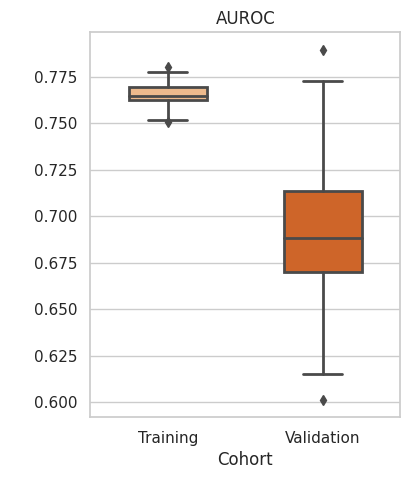

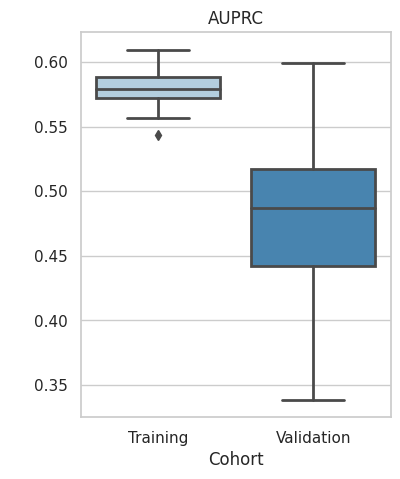

<Figure size 400x1000 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_ModelPerformance_Summary.tsv', sep='\t')



sns.set(rc={'figure.figsize':(4,5)})
sns.set_style("whitegrid")
auroc= sns.boxplot(x='Dataset', y='AUROC_Score', data=data, palette='Oranges',linewidth=2,dodge=True, width=0.5)
#sns.stripplot(x='Dataset', y='AUROC_Score', data=data, jitter= 0.2, color='black',alpha=0.5, dodge=True)
plt.xlabel("Cohort")
plt.ylabel(" ")
plt.title("AUROC")
#plt.ylim(0.25, 1.00)
plt.show()
plt.savefig('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_AUROCBoxplot.png')


sns.set(rc={'figure.figsize':(4,10)})
sns.set_style("whitegrid")
auprc=sns.boxplot(x='Dataset', y='AUPRC_Score', data=data, palette='Blues',linewidth=2,dodge=True)
#sns.stripplot(x='Death', y= coln , data=data, jitter= 0.2, color='black', dodge=True)


plt.xlabel("Cohort")
plt.ylabel(" ")
plt.title("AUPRC")
#plt.ylim(0.20, 0.80)

plt.show()
plt.savefig('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_AUPRCBoxplot.png')

In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/SergheiLabProjects/Sepsis/Sepsis_Tejas/GeneExpressionAnalysis/CellCompositionData/GeneExpData_ModelPerformance_Summary.tsv', sep='\t')
Summary = data.groupby('Dataset').describe()
Summary.T

Dataset              Training  Validation
AUROC_Score count  101.000000  101.000000
            mean     0.765524    0.690763
            std      0.006011    0.035432
            min      0.750500    0.601200
            25%      0.762200    0.670100
            50%      0.764800    0.688400
            75%      0.769200    0.713300
            max      0.780000    0.789500
AUPRC_Score count  101.000000  101.000000
            mean     0.580190    0.479072
            std      0.011948    0.057142
            min      0.543900    0.338600
            25%      0.572300    0.441900
            50%      0.579200    0.486800
            75%      0.588300    0.517500
            max      0.609500    0.598900